In [1]:
import node
import pandas as pd
import numpy as np
import collections
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/nuforc_reports.csv')
df.head(1)

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
0,My wife was driving southeast on a fairly popu...,Chester,VA,2019-12-12T18:43:00,light,5 seconds,Occurred : 12/12/2019 18:43 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151739.html,My wife was driving southeast on a fairly popu...,2019-12-22T00:00:00,37.343152,-77.408582


### Create Vect Obj

In [3]:
shapes = node.vect('shape')
shapes.set_up(df['shape'],True)
shapes.basic_stats(False) 
v=0
for p in np.unique(shapes.vector):
    v += shapes.pdf_from_mu_vect[p]
print(v)
#shapes.pdf()
print(shapes.pdf_from_mu_vect[14])


3.84
entropy: 3.84
variance: 15947509.368027031
vector_mu: 4005.681818181818
std: 3993.4332807782116
0.9999999999999999
0.09320385974782003


### Create Point & Apply KNN

In [4]:
state = node.vect('state')
state.set_up(list(df['state']),True)

x,y = state.create_corr_vectors(100,.09)
x = [abs(round(i,4)+1) for i in x]
y = [abs(round(i,4)+1) for i in y]

testNode = node.node(x[0],y[0],0,'test')
p = node.point(x, y,'shape_duration') 

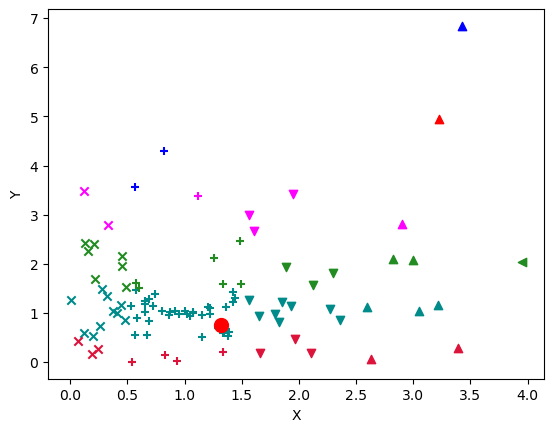

[(0.0, (0.20550000000000002, 2.4084000000000003), 'shape_duration'),
 (0.0769, (0.1301, 2.4234), 'shape_duration'),
 (0.1636, (0.1563000000000001, 2.2523999999999997), 'shape_duration'),
 (0.3536, (0.44989999999999997, 2.1528), 'shape_duration'),
 (0.4003, (0.3273999999999999, 2.7897), 'shape_duration')]

In [5]:
# TODO Pipe label from vector class to point class
p.knn_predict(testNode)

### Create More Vects

In [6]:
time_seen = node.vect('time_seen')
time_seen.set_up(list(df['duration']),False,True)

In [7]:
time_seen.pdf_from_mu(True)

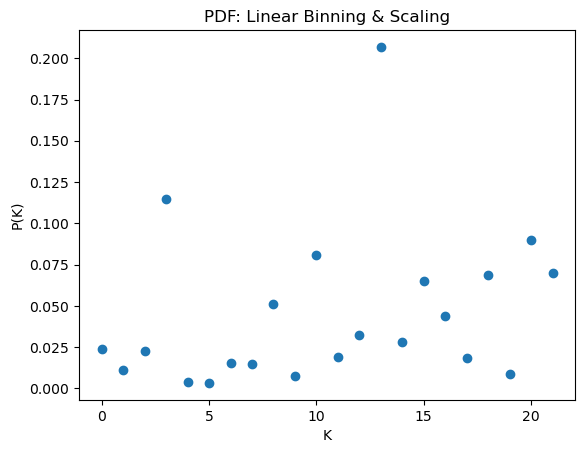

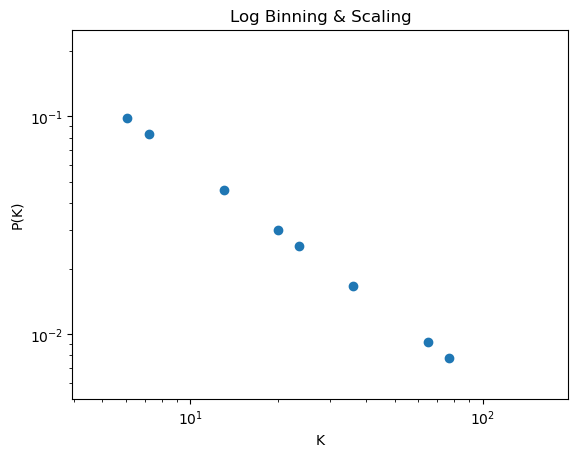

3.84


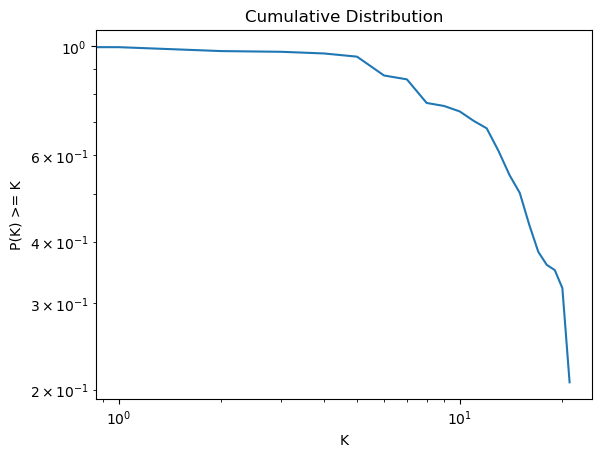

entropy: 3.84
variance: 15947509.368027031
vector_mu: 4005.681818181818
std: 3993.4332807782116


In [8]:
shapes.basic_stats(True)

### Linear Regression & Outlier Cleaning

m = 2.033080454923276 
b = -1.033080454923276


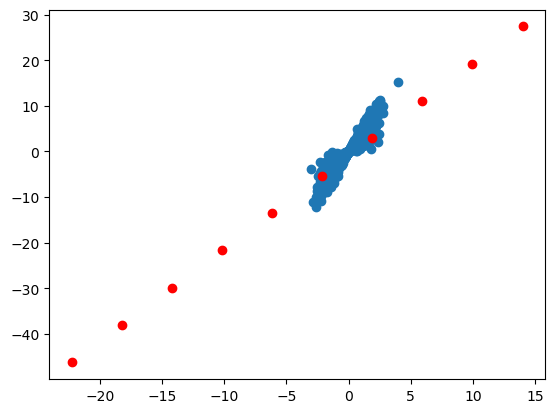

array([-46.30057544, -38.11307232, -29.92556921, -21.73806609,
       -13.55056298,  -5.36305986,   2.82444325,  11.01194637,
        19.19944948,  27.3869526 ])

In [9]:
x,y = shapes.create_corr_vectors(1000,3)
p2 = node.point(x,y,'corr_v') 
p2.linear_regression()

m = 2.021196012830842 
b = -1.021196012830842


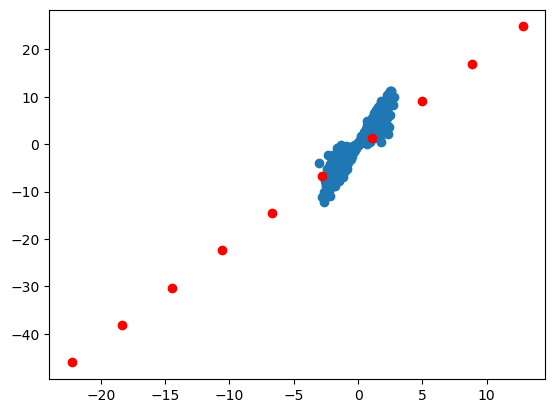

array([-46.02407829, -38.15214278, -30.28020728, -22.40827178,
       -14.53633628,  -6.66440078,   1.20753473,   9.07947023,
        16.95140573,  24.82334123])

In [10]:
p2.remove_extreme_outlier()
p2.linear_regression()

In [11]:
X = [[1, 2], [3, 4], [5, 6], [7, 8]]
X = [[1], [3], [5], [7]]

y = [0, 0, 1, 1]

p3 = node.LogisticR(X,y)

p3.logistic_regression_fit()


Cost after iteration 0: 0.6931471805599453
Cost after iteration 100: 0.5645445967628233
Cost after iteration 200: 0.5327983674120171
Cost after iteration 300: 0.5042398083802323
Cost after iteration 400: 0.47850631933147614
Cost after iteration 500: 0.45528012224693837
Cost after iteration 600: 0.4342728590483562
Cost after iteration 700: 0.4152263237245347
Cost after iteration 800: 0.39791155268641
Cost after iteration 900: 0.38212691971529367


In [12]:
p3.log_predict([[1], [6], [2]])

array([0., 1., 0.])

In [13]:
p3.y_pred

array([0.2842074 , 0.83681587, 0.3984317 ])

In [14]:
# TODO graphing function logistice regression